<a href="https://colab.research.google.com/github/Raut-Raj/IBM_Projects/blob/main/capston_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Create a sample demographics dataset
demographics_data = {
    'id': np.arange(1, 101),
    'age': np.random.randint(18, 70, 100),
    'gender': np.random.choice(['Male', 'Female'], 100)
}

demographics_df = pd.DataFrame(demographics_data)
demographics_df.to_csv('demographics.csv', index=False)

# Create a sample health dataset
health_data = {
    'id': np.arange(1, 101),
    'height': np.random.uniform(150, 200, 100),  # cm
    'weight': np.random.uniform(50, 100, 100),   # kg
    'blood_pressure': np.random.randint(110, 140, 100)
}

health_df = pd.DataFrame(health_data)
health_df.to_csv('health.csv', index=False)

# Create a sample purchase dataset
purchase_data = {
    'id': np.arange(1, 101),
    'purchases': np.random.randint(0, 20, 100),  # Number of purchases
    'total_spent': np.random.uniform(100, 2000, 100)  # Total money spent
}

purchase_df = pd.DataFrame(purchase_data)
purchase_df.to_csv('purchases.csv', index=False)

print("Sample datasets created and saved as 'demographics.csv', 'health.csv', and 'purchases.csv'.")


Sample datasets created and saved as 'demographics.csv', 'health.csv', and 'purchases.csv'.


In [3]:
# Load datasets
demographics_df = pd.read_csv('demographics.csv')
health_df = pd.read_csv('health.csv')
purchase_df = pd.read_csv('purchases.csv')

# Merge datasets on 'id'
merged_df = demographics_df.merge(health_df, on='id').merge(purchase_df, on='id')
print(merged_df.head())


   id  age  gender      height     weight  blood_pressure  purchases  \
0   1   49    Male  156.476354  66.315866             114         13   
1   2   60    Male  199.327646  55.487046             128          5   
2   3   31    Male  197.585195  59.551248             112         13   
3   4   20  Female  199.688047  85.240511             136          8   
4   5   26  Female  156.026619  63.871484             139          0   

   total_spent  
0   755.731632  
1  1754.297123  
2  1605.906539  
3  1102.278792  
4  1612.468807  


In [4]:
# Data cleaning: Check for and handle missing values
print(merged_df.isnull().sum())
merged_df.dropna(inplace=True)

# Reset index after dropping rows
merged_df.reset_index(drop=True, inplace=True)


id                0
age               0
gender            0
height            0
weight            0
blood_pressure    0
purchases         0
total_spent       0
dtype: int64


               id         age      height      weight  blood_pressure  \
count  100.000000  100.000000  100.000000  100.000000      100.000000   
mean    50.500000   44.600000  172.629388   75.402781      123.230000   
std     29.011492   15.497149   15.691959   13.783806        8.412179   
min      1.000000   18.000000  150.005309   50.437317      110.000000   
25%     25.750000   30.750000  157.499626   64.520789      116.000000   
50%     50.500000   45.500000  172.131657   74.651434      122.500000   
75%     75.250000   60.000000  185.716435   87.363903      129.250000   
max    100.000000   69.000000  199.688047   99.755140      139.000000   

        purchases  total_spent  
count  100.000000   100.000000  
mean     9.760000  1051.003409  
std      5.742136   586.831230  
min      0.000000   101.718207  
25%      5.000000   508.402654  
50%      9.000000  1058.877422  
75%     15.000000  1607.329599  
max     19.000000  1918.058458  


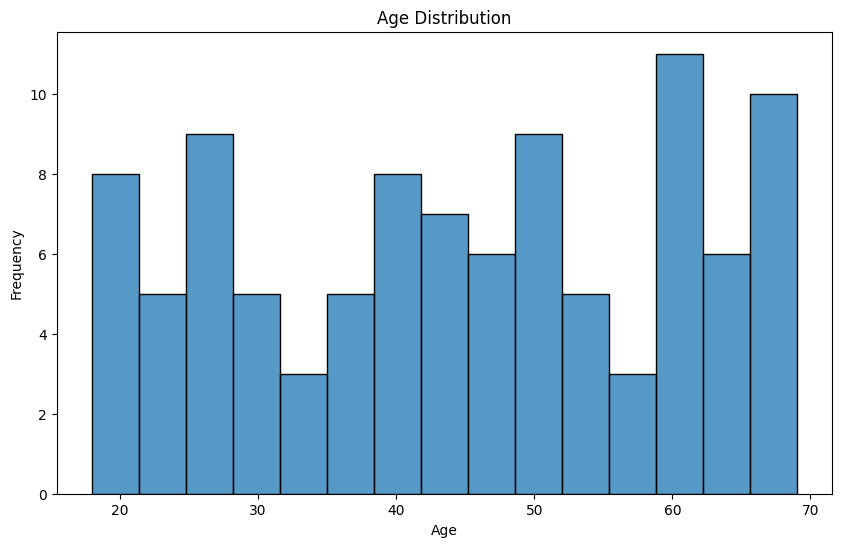

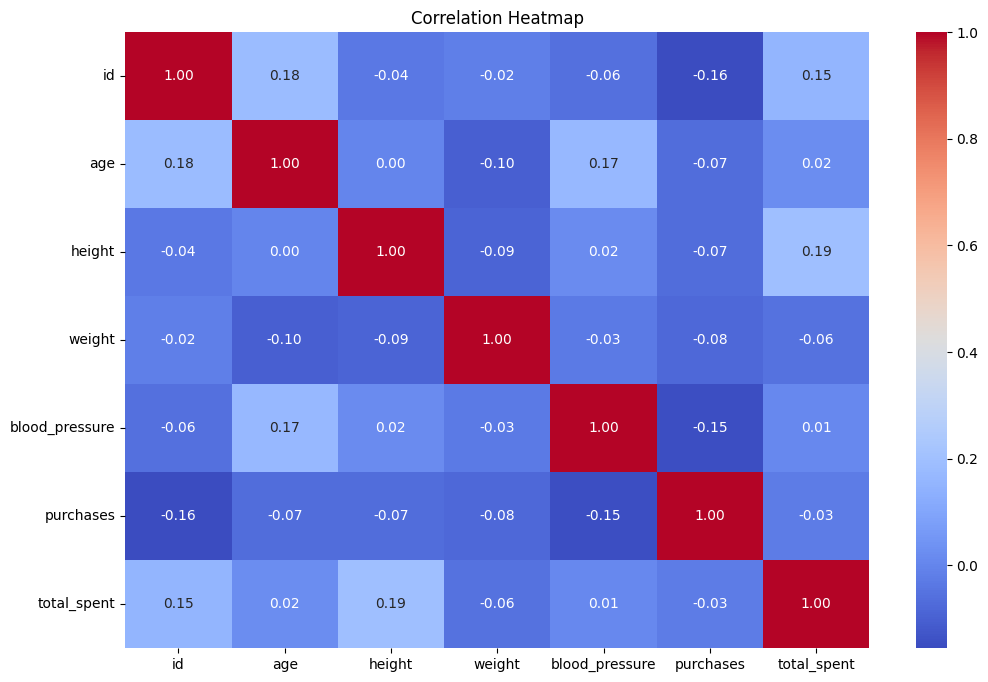

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(merged_df.describe())

# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['age'], bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap - Select only numeric columns
numeric_df = merged_df.select_dtypes(include=np.number) # Select only columns with numeric data types
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable (predicting purchases)
X = merged_df[['age', 'height', 'weight', 'blood_pressure']]
y = merged_df['purchases'] > 5  # Target: True if more than 5 purchases

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00         6
        True       0.65      0.79      0.71        14

    accuracy                           0.55        20
   macro avg       0.32      0.39      0.35        20
weighted avg       0.45      0.55      0.50        20

[[ 0  6]
 [ 3 11]]


In [8]:
import folium

# Create a map centered at a specific location (example coordinates)
map_center = [37.7749, -122.4194]  # San Francisco
m = folium.Map(location=map_center, zoom_start=10)

# Add markers based on age and total spent
for _, row in merged_df.iterrows():
    folium.Marker(
        location=[map_center[0] + row['age'] * 0.001, map_center[1] + row['total_spent'] * 0.0001],
        popup=f"ID: {row['id']}, Age: {row['age']}, Spent: ${row['total_spent']:.2f}"
    ).add_to(m)

# Save the map to an HTML file
m.save('map.html')
print("Map saved as 'map.html'.")


Map saved as 'map.html'.


In [10]:
!pip install dash
import dash
from dash import dcc, html
import plotly.express as px

app = dash.Dash(__name__)

fig = px.scatter(merged_df, x='age', y='total_spent', color='gender', title='Total Spent vs Age')

app.layout = html.Div([
    html.H1('Customer Analysis Dashboard'),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>